## Load and Explore the Shapefile

In [30]:
# imports
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import sys

from keplergl import KeplerGl
from shapely.geometry import Point, Polygon

In [31]:
# set the path to the data/raw directory
path = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'raw'))


# Load the shapefile
gdf = gpd.read_file('../data/raw/ltm_shapefiles/zones_level3.shp')


# load green mobility data
gm = pd.read_csv('../data/raw/GM_preparedData.csv')


In [32]:
# see gdf head
gdf.head()



,OBJECTID,komnr,zoneid,zonenavn,zonedescri,numadresse,Shape_Leng,Shape_Area,geometry
0,794,760,760142,Borris,"Ringkøbing-Skjern Kommune, Sydøst",670,47170.786832,9.392093e+07,"POLYGON ((482065.500 6202415.410, 483132.330 6..."
1,795,760,760141,Troldhede,"Ringkøbing-Skjern Kommune, Sydøst",432,15619.978142,1.136408e+07,"POLYGON ((484178.401 6206641.664, 484168.180 6..."
2,796,825,825001,Østerby,Læsø Kommune,1157,46750.658885,2.084958e+07,"MULTIPOLYGON (((630129.060 6348955.780, 630138..."
3,1030,482,482013,Snøde,Langeland Kommune,492,18537.493622,1.719793e+07,"POLYGON ((623762.258 6107756.661, 623763.090 6..."
4,1031,482,482015,Tullebølle,Langeland Kommune,789,26069.391636,2.855963e+07,"POLYGON ((618300.281 6094390.702, 618507.508 6..."


In [33]:
gdf.geometry.values[0:1]

<GeometryArray>
[<POLYGON ((482065.5 6202415.41, 483132.33 6201844.15, 483107.98 6202005.19, ...>]
Length: 1, dtype: geometry

In [34]:
# filter geomentry to include a poligon interval of copehagen greater area
cop_area = gpd.read_file('../data/processed/cop_area.shp')

In [35]:
cop_area.head()

,OBJECTID,komnr,zoneid,zonenavn,zonedescri,numadresse,Shape_Leng,Shape_Area,geometry
0,6585,153,153035,Brøndby Strand NV,Brøndby Kommune,469,5881.304215,6.368232e+05,"MULTIPOLYGON (((717065.090 6167793.410, 717080..."
1,6586,153,153033,Brøndby Strand SV,Brøndby Kommune,567,4178.555401,8.232537e+05,"POLYGON ((714912.062 6169465.885, 714940.877 6..."
2,6588,187,187011,Vallensbæk S,Vallensbæk Kommune,805,7083.711295,1.352975e+06,"POLYGON ((714253.370 6168940.880, 714265.630 6..."
3,6589,153,153021,Brøndbyvester S,Brøndby Kommune,1116,8278.683910,3.304261e+06,"POLYGON ((715846.736 6170548.621, 715502.058 6..."
4,6590,153,153024,Brøndbyvester NNØ,Brøndby Kommune,598,3947.614780,6.585726e+05,"POLYGON ((714678.550 6173491.270, 714675.401 6..."


In [36]:
# load an empty map
map_1 = KeplerGl(height=600, width=800)
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=600)

In [37]:
# add data to the map 
map_1.add_data(data=cop_area, name='zones')
map_1.add_data(data=gm, name='green mobility')

c:\ProgramData\anaconda3\envs\thesis\Lib\site-packages\jupyter_client\session.py:719: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [38]:
# list all the unique values in zinedescri column in alphabetical order
sorted(gdf['zonedescri'].unique())

# create a dictionary to map each unique zonedescri column to numadresse. Sort the dictionary by key
zonedescri_to_numadresse = dict(sorted(gdf[['zonenavn', 'zoneid']].values.tolist()))

zonedescri_to_numadresse


{'Aabenraa C': 580124,
 'Aabenraa N': 580128,
 'Aabenraa NØ': 580121,
 'Aabenraa S': 580125,
 'Aabenraa SV': 580126,
 'Aabenraa Syd V': 580132,
 'Aabenraa Syd Ø': 580131,
 'Aabenraa SØ': 580123,
 'Aabenraa V': 580127,
 'Aabenraa Ø': 580122,
 'Aabybro N': 849114,
 'Aabybro S': 849115,
 'Aabybro Ø': 849113,
 'Aakirkeby': 400143,
 'Aalborg Lufthvan': 851841,
 'Aalborg SV Station V': 851222,
 'Aalborg SV Station Ø': 851345,
 'Aalborg Syd Midt': 851735,
 'Aalborg Syd N': 851731,
 'Aalborg Syd NV': 851732,
 'Aalborg Syd NØ': 851733,
 'Aalborg Syd S': 851736,
 'Aalborg Syd SV': 851737,
 'Aalborg Syd Ø': 851734,
 'Aalborg Vest N': 851772,
 'Aalborg Vest S': 851771,
 'Aalborg havn Midt': 851762,
 'Aalborg havn S': 851751,
 'Aalborg havn Ø': 851761,
 'Aalborg nordøst Midt': 851364,
 'Aalborg nordøst N': 851363,
 'Aalborg nordøst SV': 851366,
 'Aalborg nordøst SØ': 851361,
 'Aalborg nordøst V': 851365,
 'Aalborg nordøst Ø': 851362,
 'Aalborg sydøst NV': 851352,
 'Aalborg sydøst NØ': 851351,
 'Aal

In [41]:
# list unique values in the 'zoneid' column
len(gdf.zoneid.unique())

3670

In [42]:
# find if zoneid 270110 is in the dataframe
gdf[gdf['zoneid'] == 2701]


,OBJECTID,komnr,zoneid,zonenavn,zonedescri,numadresse,Shape_Leng,Shape_Area,geometry


In [43]:
sorted(gdf.zoneid.unique())


[102111,
 102121,
 102122,
 102131,
 102141,
 102142,
 102151,
 102152,
 102161,
 102162,
 102171,
 102172,
 102181,
 102182,
 102183,
 102184,
 102211,
 102212,
 102213,
 102214,
 102221,
 102222,
 102223,
 102224,
 102231,
 102311,
 102312,
 102321,
 102322,
 102323,
 102324,
 102325,
 102331,
 102332,
 102333,
 102334,
 102335,
 102336,
 102341,
 102342,
 102343,
 102344,
 102351,
 102352,
 102353,
 102411,
 102412,
 102413,
 102414,
 102421,
 102422,
 102423,
 102431,
 102432,
 102433,
 102434,
 102441,
 102442,
 102443,
 102444,
 102445,
 102451,
 102452,
 102453,
 102454,
 102455,
 102511,
 102512,
 102513,
 102521,
 102522,
 102531,
 102532,
 102533,
 102534,
 102541,
 102542,
 102543,
 102551,
 102552,
 102553,
 102554,
 102561,
 102562,
 102563,
 102611,
 102612,
 102613,
 102614,
 102615,
 102621,
 102622,
 102623,
 102631,
 102632,
 102633,
 102634,
 102641,
 102642,
 102643,
 102644,
 102645,
 102651,
 102652,
 102653,
 102661,
 102662,
 102663,
 102664,
 102665,
 102671,
 

In [44]:
# explore zonenavn column values
# see if copenhagen is in there in forms of Copenhagen, Kobenhavn and so on 

sorted(gdf['zonenavn'].unique())



['Aabenraa C',
 'Aabenraa N',
 'Aabenraa NØ',
 'Aabenraa S',
 'Aabenraa SV',
 'Aabenraa Syd V',
 'Aabenraa Syd Ø',
 'Aabenraa SØ',
 'Aabenraa V',
 'Aabenraa Ø',
 'Aabybro N',
 'Aabybro S',
 'Aabybro Ø',
 'Aakirkeby',
 'Aalborg Lufthvan',
 'Aalborg SV Station V',
 'Aalborg SV Station Ø',
 'Aalborg Syd Midt',
 'Aalborg Syd N',
 'Aalborg Syd NV',
 'Aalborg Syd NØ',
 'Aalborg Syd S',
 'Aalborg Syd SV',
 'Aalborg Syd Ø',
 'Aalborg Vest N',
 'Aalborg Vest S',
 'Aalborg havn Midt',
 'Aalborg havn S',
 'Aalborg havn Ø',
 'Aalborg nordøst Midt',
 'Aalborg nordøst N',
 'Aalborg nordøst SV',
 'Aalborg nordøst SØ',
 'Aalborg nordøst V',
 'Aalborg nordøst Ø',
 'Aalborg sydøst NV',
 'Aalborg sydøst NØ',
 'Aalborg sydøst SV',
 'Aalborg sydøst SØ',
 'Aalborg sydøst V',
 'Aalborg sydøst Ø',
 'Aarhus Lufthavn',
 'Aarup N',
 'Aarup S',
 'Abild',
 'Adsbøl',
 'Adslev',
 'Agarnæs',
 'Agedrup',
 'Agerbæk',
 'Agerskov',
 'Agersted',
 'Agersø',
 'Agger',
 'Aggersund N',
 'Aggersund S',
 'Ajstrup',
 'Akselholm'

In [45]:
# filer gdf to only include the zones in the city of Copenhagen
cph_gdf = gdf[gdf['KOMNAVN'] == 'København']

# Display the first few rows of the dataframe
print(cph_gdf.head())

KeyError: 'KOMNAVN'

## Use Seaborn for Improved Aesthetics

In [ ]:

import seaborn as sns
sns.set_style("whitegrid")


## Visualize the Shapefile

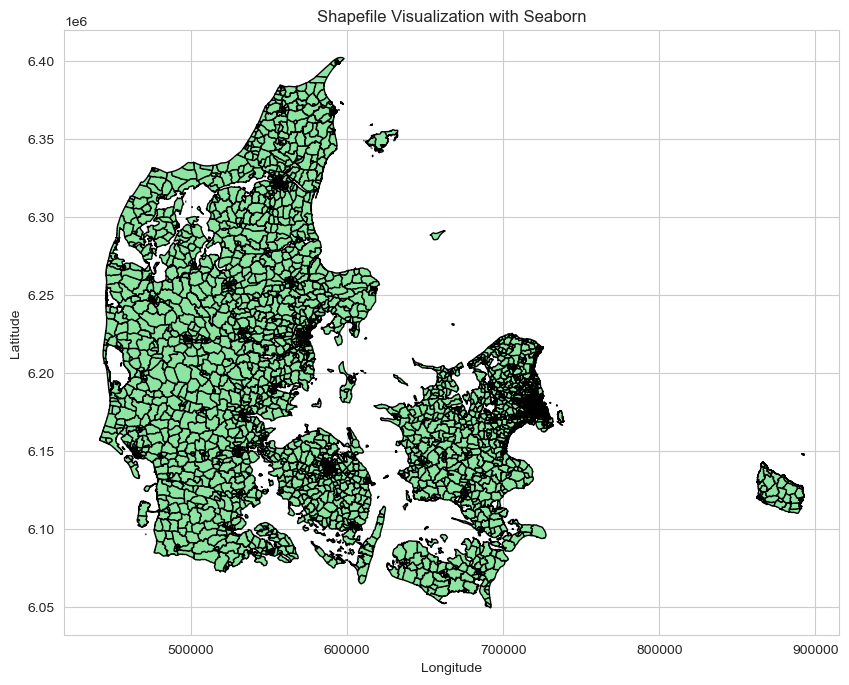

In [ ]:

import matplotlib.pyplot as plt

# Plot the shapefile using a Seaborn color palette
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color=sns.color_palette("pastel")[2], edgecolor='black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Shapefile Visualization with Seaborn')
plt.show()


## Manipulate and Analyze Data

In [ ]:

# Example: Filter the data based on an attribute
# Note: Replace 'attribute_name' and 'desired_value' with actual values from your data
# filtered_gdf = gdf[gdf['attribute_name'] == 'desired_value']


## Overlay Image on Shapefile